In [2]:
import random, gym, math
from gym import error, spaces
import pandas as pd
import numpy as np
from enum import Enum
from stockstats import StockDataFrame
# from tensorboardX import SummaryWriter

import gym

import tensorflow as tf
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, MlpLstmPolicy, ActorCriticPolicy, LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines import PPO2, PPO1, A2C, DQN, TD3, SAC, ACER

# from stable_baselines3.common.policies import MlpPolicy
# from stable_baselines3 import PPO
# from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3.common.evaluation import evaluate_policy

from sklearn import preprocessing

import datetime
import backtrader as bt
import backtrader.indicators as bi
from backtrader.feeds import PandasData

import matplotlib.pyplot as plt

from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo, Blackly

In [3]:
from lutils.stock import LTdxHq

In [4]:
# result = pd.read_pickle('d:/d.pkl')

In [5]:
# result[y_kmeans==5]

In [6]:
MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_NUM_AMOUNTS = 2147483647
MAX_SHARE_PRICE = 5000
MAX_OPEN_POSITIONS = 60
MAX_STEPS = 240 # 40000
NEXT_OBSERVATION_SIZE = 10

INITIAL_ACCOUNT_BALANCE = 10000

# writer = SummaryWriter('log')

In [7]:
# ltdxhq = LTdxHq()
# code = '603636' # 603828 603828 000032 300142 603636 600519
# # df = ltdxhq.get_k_data_1min(code, end='2021-09-02') # 000032 300142 603636 600519
# df = ltdxhq.get_k_data_daily(code, end='2021-01-01') # 000032 300142 603636 600519
# df = StockDataFrame(df.rename(columns={'vol': 'volume'}))
# # df['macd']
# # df['kdjk']
# # df['rsi_6']
# # df['rsi_12']

# # df_eval = ltdxhq.get_k_data_1min(code, start='2021-08-10')
# df_eval = ltdxhq.get_k_data_daily(code, start='2021-01-01')
# df_eval = StockDataFrame(df_eval.rename(columns={'vol': 'volume'}))

# ltdxhq.close()

In [8]:
# ltdxhq = LTdxHq()

# codes = ['603636', ] # '603828', '603828', '000032', '300142', '603636', '600519'
# dfs = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, end='2021-01-01')
# #     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     dfs.append(_df) # / _df.max())

# df = pd.concat(dfs)

# df_evals = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, start='2021-01-01')
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     df_evals.append(_df)
# ltdxhq.close()

In [10]:
ltdxhq = LTdxHq()

# codes = ['603636', '603828', '688698', '000032', '300142', '603636', ] # '600519'
codes = ['600603', '600583', '600582', '600565', '600558', '600551',
       '600509', '600503', '600488', '600469', '600439', '600433',
       '600428', '600425', '600387', '600383', '600382', '600369',
       '600339', '600337', '600335', '600326', '600320', '600312',
       '002666', '002654', '002641', '002628', '002627', '002620',
       '002608', '002593', '002586', '002582', '002566', '002560',]
dfs = []
df_evals = []
for code in codes:
    _df = ltdxhq.get_k_data_daily(code)
#     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
    _df = _df.rename(columns={'vol': 'volume'})
    
    _df = _df.assign(open_normal = _df.open / _df.open.max())
    _df = _df.assign(close_normal = _df.close / _df.close.max())
    _df = _df.assign(high_normal = _df.high / _df.high.max())
    _df = _df.assign(low_normal = _df.low / _df.low.max())
    _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
    _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
    dfs.append(_df.loc[:'2021-01-01']) # / _df.max())
    df_evals.append(_df.loc['2021-01-01':])
    
df = pd.concat(dfs)

ltdxhq.close()

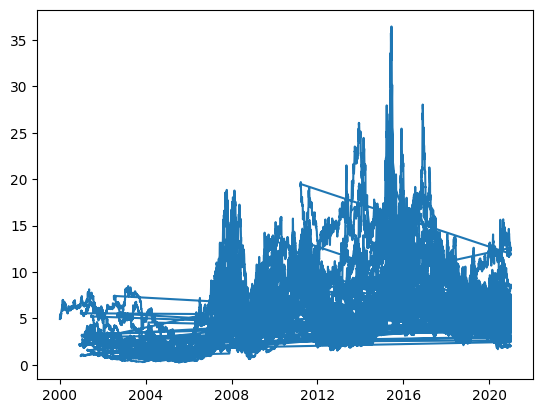

In [11]:
plt.plot(df.close)
plt.show()

In [12]:
df

,open,close,high,low,volume,amount,open_normal,close_normal,high_normal,low_normal,volume_normal,amount_normal
date,,,,,,,,,,,,
2000-01-04,4.78,4.94,4.95,4.77,1400800.0,19873510.0,0.469087,0.477756,0.455801,0.472277,0.014870,0.022972
2000-01-05,4.93,5.19,5.43,4.86,7043100.0,107845504.0,0.483808,0.501934,0.500000,0.481188,0.074764,0.124658
2000-01-06,5.13,5.35,5.37,5.07,2145300.0,32499732.0,0.503435,0.517408,0.494475,0.501980,0.022773,0.037566
2000-01-07,5.35,5.43,5.61,5.27,7018700.0,110908752.0,0.525025,0.525145,0.516575,0.521782,0.074505,0.128199
2000-01-10,5.44,5.48,5.60,5.33,5804700.0,92433640.0,0.533857,0.529981,0.515654,0.527723,0.061618,0.106843
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,8.38,8.57,8.65,8.32,7890620.0,67008188.0,0.490058,0.520024,0.492316,0.517735,0.061927,0.043108
2020-12-28,8.55,8.35,8.59,8.25,7404903.0,61921968.0,0.500000,0.506675,0.488902,0.513379,0.058115,0.039836
2020-12-29,8.35,8.35,8.52,8.33,5257100.0,44167640.0,0.488304,0.506675,0.484917,0.518357,0.041259,0.028414


In [13]:
class Actions(Enum):
    Hold = 0
    Sell = 1
    Buy = 2

In [53]:
ddd = []
class LStockDailyEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df):
        super(LStockDailyEnv, self).__init__()

#         self.df = df / df.max()
#         self.max = df.max()
        self.df = df
        self.max = df.max()

        self.current_step = NEXT_OBSERVATION_SIZE - 1

#         self.reward_range = (-np.inf, np.inf)
        self.reward_range = (-1, 1)

#         self.action_space = spaces.Box(low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float16)
        self.action_space = spaces.Discrete(len(Actions))
        
        self.observation_space = spaces.Box(low=-1, high=1, shape=(6, NEXT_OBSERVATION_SIZE + 1), dtype=np.float16)
#         self.min_max_scaler = preprocessing.MinMaxScaler()

    def _next_observation(self):
        # Get the stock data points for the last 5 days and scale to between 0-1
        frame = np.array([
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['open'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['high'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['low'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['close'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['vol'].values / MAX_NUM_SHARES,

            # self.df['macd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macdh'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macds'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['volume_delta'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_2_d'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_-2_r'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr-ma1'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma2'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma3'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # self.df['kdjk'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjj'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # self.df['open_2_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['pdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['mdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adxr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['tema'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['vr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['vr_6_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,

#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume'].values / MAX_NUM_SHARES,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount'].values / MAX_NUM_SHARES,

#             self.df['macd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macdh'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macds'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjk'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjj'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,

#             self.df['rsi_6'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['rsi_12'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
            
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount_normal'].values,

        ])
        
        bal = np.ones([6, 1]) * self.balance / self.net_worth
#         act = np.ones([6, 1]) * action / 2
        
        frame = np.hstack([frame, bal, ]) # act
        
#         print(frame)
#         print('##########')
#         frame = self.min_max_scaler.fit_transform(frame)
# #         frame = pd.DataFrame(min_max_scaler.fit_transform(df), index=df.index, columns=df.columns)
# #         frame = self.scaler.fit_transform(frame)
#         print(frame)
#         print('*****************')
        
        return frame

    def _take_action(self, action):
        current_price = self.df.iloc[self.current_step]['close'] # + 0.02
        tomorrow_price = self.df.iloc[self.current_step + 1]['close'] # + 0.02
        
        if action == Actions.Buy.value:
            # Buy amount % of balance in shares
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible / 100)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price * 100

            self.balance -= additional_cost
            self.cost_basis = (prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought

        elif action == Actions.Sell.value:
            # Sell amount % of shares held
            shares_sold = int(self.shares_held)
            self.balance += shares_sold * current_price * 100
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * tomorrow_price * 100
        
#         print(self.balance, self.net_worth, self.shares_held, current_price)
        
        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0
        
        
    def step(self, action):
        # Execute one time step within the environment
        shares_held = self.shares_held
        self._take_action(action)
        obs = self._next_observation()
        
        reward = 0
        
        # done =  (self.current_step + 1) >= self.df.shape[0] or self.net_worth <= INITIAL_ACCOUNT_BALANCE * .5 or self.df.index[self.current_step].weekday() == 4 
        done = ((self.current_step + 2) >= self.df.shape[0] 
                or self.net_worth <= INITIAL_ACCOUNT_BALANCE * .5 
                or action == Actions.Sell.value)
        
#         if not done:
# #             if action_type < 1: # Buy
# #                 reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
# #             elif action_type >= 1 and action_type < 2: # Sell
# #                 reward = self.df.iloc[self.current_step]['close'] - self.df.iloc[self.current_step + 1]['close']
# #             else: # Hold
# #                 reward = self.net_worth - self.old_net_worth # self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
            
#             reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
#             if (self.shares_held <= 0 and reward > 0) or (self.shares_held > 0 and reward < 0):
#                 reward = -reward
            
#             if action == Actions.Buy.value: # buy
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Sell.value: # sell
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Hold.value and self.shares_held <= 0:
#                 reward = -np.abs(reward) # -(np.abs(reward) / self.df.iloc[self.current_step + 1]['close'])
            
# #             print(action, reward)
#             self.old_balance = self.balance
#         else:
# #             reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE) / INITIAL_ACCOUNT_BALANCE
# #             print(self.balance, reward)
#             reward = self.net_worth - INITIAL_ACCOUNT_BALANCE
        
#         self.old_net_worth = self.net_worth
#         self.current_step = self.current_step + 1
        
    
        if done:
            reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE)
        else:
            reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE) * .5
        
        ddd.append([self.net_worth, reward, action, self.current_step])
        
        self.current_step = self.current_step + 1
        return obs, reward, done, {'net_worth': self.net_worth}

    def reset(self):
        # Reset the state of the environment to an initial state
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.old_balance = self.balance
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.old_net_worth = self.net_worth
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0

        self.current_step = self.current_step + 1
        if (self.current_step + 5) >= self.df.shape[0]:
            self.current_step = NEXT_OBSERVATION_SIZE

        return self._next_observation()

    def render(self, mode='human', close=False):
        # Render the environment to the screen
        profit = self.net_worth - INITIAL_ACCOUNT_BALANCE

        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        print(f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        print(f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
        print(f'Profit: {profit}')

In [54]:
# env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(net_arch=[128, 'lstm', dict(vf=[256, 256], pi=[256, 256])])

# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
# model.learn(total_timesteps=100000)
# # model.save('ppo_stock')

In [55]:
env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(act_fun=tf.nn.tanh, net_arch=[256, 256, 'lstm', 256, dict(pi=[128, 64, 32, 16], vf=[128, 128, 128])])
# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)

policy_kwargs = dict(net_arch=[256, 256, 256, dict(pi=[128, 64, 32, 16], vf=[128, 128, 128])])
model = PPO2('MlpPolicy', env, verbose=1, policy_kwargs=policy_kwargs)

model.learn(total_timesteps=200000)
# model.save('ppo_stock')

--------------------------------------
| approxkl           | 9.830819e-07  |
| clipfrac           | 0.0           |
| explained_variance | -0.000186     |
| fps                | 334           |
| n_updates          | 1             |
| policy_entropy     | 1.0985935     |
| policy_loss        | -5.045603e-05 |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 91093.51      |
--------------------------------------
---------------------------------------
| approxkl           | 3.142568e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.000134       |
| fps                | 841            |
| n_updates          | 2              |
| policy_entropy     | 1.0985606      |
| policy_loss        | -0.00035602693 |
| serial_timesteps   | 256            |
| time_elapsed       | 0.382          |
| total_timesteps    | 256            |
| value_loss         | 125053.09      |
-------------

--------------------------------------
| approxkl           | 8.720541e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.000107      |
| fps                | 858           |
| n_updates          | 16            |
| policy_entropy     | 1.0985742     |
| policy_loss        | -0.0004633261 |
| serial_timesteps   | 2048          |
| time_elapsed       | 2.53          |
| total_timesteps    | 2048          |
| value_loss         | 119937.9      |
--------------------------------------
---------------------------------------
| approxkl           | 1.3414394e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.000221       |
| fps                | 847            |
| n_updates          | 17             |
| policy_entropy     | 1.0985605      |
| policy_loss        | -0.00044675934 |
| serial_timesteps   | 2176           |
| time_elapsed       | 2.68           |
| total_timesteps    | 2176           |
| value_loss         | 202370.0       |
-------------

--------------------------------------
| approxkl           | 1.2690652e-05 |
| clipfrac           | 0.0           |
| explained_variance | 7.28e-05      |
| fps                | 804           |
| n_updates          | 33            |
| policy_entropy     | 1.0982394     |
| policy_loss        | 0.0005152996  |
| serial_timesteps   | 4224          |
| time_elapsed       | 5.14          |
| total_timesteps    | 4224          |
| value_loss         | 127583.48     |
--------------------------------------
--------------------------------------
| approxkl           | 2.029465e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.000263      |
| fps                | 836           |
| n_updates          | 34            |
| policy_entropy     | 1.0979965     |
| policy_loss        | -0.0002799076 |
| serial_timesteps   | 4352          |
| time_elapsed       | 5.3           |
| total_timesteps    | 4352          |
| value_loss         | 707768.4      |
-------------------------

--------------------------------------
| approxkl           | 3.6070837e-06 |
| clipfrac           | 0.0           |
| explained_variance | 7.87e-05      |
| fps                | 855           |
| n_updates          | 50            |
| policy_entropy     | 1.0982455     |
| policy_loss        | 0.00038101594 |
| serial_timesteps   | 6400          |
| time_elapsed       | 7.77          |
| total_timesteps    | 6400          |
| value_loss         | 423432.3      |
--------------------------------------
---------------------------------------
| approxkl           | 3.1009472e-06  |
| clipfrac           | 0.0            |
| explained_variance | 1.23e-05       |
| fps                | 858            |
| n_updates          | 51             |
| policy_entropy     | 1.0982252      |
| policy_loss        | -0.00030061317 |
| serial_timesteps   | 6528           |
| time_elapsed       | 7.92           |
| total_timesteps    | 6528           |
| value_loss         | 132871.58      |
-------------

--------------------------------------
| approxkl           | 1.3646626e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000102      |
| fps                | 841           |
| n_updates          | 67            |
| policy_entropy     | 1.0969634     |
| policy_loss        | 2.5699148e-05 |
| serial_timesteps   | 8576          |
| time_elapsed       | 10.4          |
| total_timesteps    | 8576          |
| value_loss         | 63307.363     |
--------------------------------------
--------------------------------------
| approxkl           | 6.161266e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000982      |
| fps                | 822           |
| n_updates          | 68            |
| policy_entropy     | 1.0969497     |
| policy_loss        | -0.0021039757 |
| serial_timesteps   | 8704          |
| time_elapsed       | 10.5          |
| total_timesteps    | 8704          |
| value_loss         | 127317.84     |
-------------------------

---------------------------------------
| approxkl           | 6.181973e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000595      |
| fps                | 870            |
| n_updates          | 83             |
| policy_entropy     | 1.0975982      |
| policy_loss        | -0.00038735638 |
| serial_timesteps   | 10624          |
| time_elapsed       | 12.9           |
| total_timesteps    | 10624          |
| value_loss         | 257159.03      |
---------------------------------------
---------------------------------------
| approxkl           | 3.9386573e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000551       |
| fps                | 799            |
| n_updates          | 84             |
| policy_entropy     | 1.0980908      |
| policy_loss        | -0.00038891076 |
| serial_timesteps   | 10752          |
| time_elapsed       | 13             |
| total_timesteps    | 10752          |
| value_loss         | 310106.16      |


--------------------------------------
| approxkl           | 8.6422115e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.000645      |
| fps                | 824           |
| n_updates          | 99            |
| policy_entropy     | 1.0909634     |
| policy_loss        | -0.0005688097 |
| serial_timesteps   | 12672         |
| time_elapsed       | 15.3          |
| total_timesteps    | 12672         |
| value_loss         | 97709.14      |
--------------------------------------
--------------------------------------
| approxkl           | 5.027648e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00197       |
| fps                | 853           |
| n_updates          | 100           |
| policy_entropy     | 1.0912353     |
| policy_loss        | -0.0019957493 |
| serial_timesteps   | 12800         |
| time_elapsed       | 15.5          |
| total_timesteps    | 12800         |
| value_loss         | 73481.15      |
-------------------------

---------------------------------------
| approxkl           | 2.0716534e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000922       |
| fps                | 817            |
| n_updates          | 116            |
| policy_entropy     | 1.0867312      |
| policy_loss        | -0.00013828086 |
| serial_timesteps   | 14848          |
| time_elapsed       | 18             |
| total_timesteps    | 14848          |
| value_loss         | 129482.04      |
---------------------------------------
--------------------------------------
| approxkl           | 4.503748e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000673     |
| fps                | 804           |
| n_updates          | 117           |
| policy_entropy     | 1.0863088     |
| policy_loss        | -0.0003321682 |
| serial_timesteps   | 14976         |
| time_elapsed       | 18.2          |
| total_timesteps    | 14976         |
| value_loss         | 296915.56     |
------------

--------------------------------------
| approxkl           | 3.325541e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000218      |
| fps                | 847           |
| n_updates          | 132           |
| policy_entropy     | 1.0906408     |
| policy_loss        | 1.6780337e-05 |
| serial_timesteps   | 16896         |
| time_elapsed       | 20.5          |
| total_timesteps    | 16896         |
| value_loss         | 1247987.1     |
--------------------------------------
--------------------------------------
| approxkl           | 7.678183e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.000678     |
| fps                | 780           |
| n_updates          | 133           |
| policy_entropy     | 1.0939534     |
| policy_loss        | -0.0026711547 |
| serial_timesteps   | 17024         |
| time_elapsed       | 20.7          |
| total_timesteps    | 17024         |
| value_loss         | 535042.7      |
-------------------------

-------------------------------------
| approxkl           | 4.606881e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.00181      |
| fps                | 802          |
| n_updates          | 149          |
| policy_entropy     | 1.0797609    |
| policy_loss        | 0.0020709098 |
| serial_timesteps   | 19072        |
| time_elapsed       | 23.3         |
| total_timesteps    | 19072        |
| value_loss         | 61296.098    |
-------------------------------------
--------------------------------------
| approxkl           | 4.536555e-05  |
| clipfrac           | 0.0           |
| explained_variance | -7.31e-05     |
| fps                | 804           |
| n_updates          | 150           |
| policy_entropy     | 1.0778178     |
| policy_loss        | -0.0001221929 |
| serial_timesteps   | 19200         |
| time_elapsed       | 23.4          |
| total_timesteps    | 19200         |
| value_loss         | 134053.95     |
--------------------------------------

--------------------------------------
| approxkl           | 2.5808408e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.004         |
| fps                | 775           |
| n_updates          | 166           |
| policy_entropy     | 1.0196531     |
| policy_loss        | 8.616329e-05  |
| serial_timesteps   | 21248         |
| time_elapsed       | 26.1          |
| total_timesteps    | 21248         |
| value_loss         | 90334.86      |
--------------------------------------
---------------------------------------
| approxkl           | 8.441689e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.00121        |
| fps                | 794            |
| n_updates          | 167            |
| policy_entropy     | 1.0222731      |
| policy_loss        | -0.00039950677 |
| serial_timesteps   | 21376          |
| time_elapsed       | 26.3           |
| total_timesteps    | 21376          |
| value_loss         | 106112.53      |
-------------

---------------------------------------
| approxkl           | 5.04122e-06    |
| clipfrac           | 0.0            |
| explained_variance | -0.000525      |
| fps                | 735            |
| n_updates          | 183            |
| policy_entropy     | 1.0006429      |
| policy_loss        | -1.4541438e-06 |
| serial_timesteps   | 23424          |
| time_elapsed       | 28.9           |
| total_timesteps    | 23424          |
| value_loss         | 66114.78       |
---------------------------------------
--------------------------------------
| approxkl           | 2.2787499e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.42e-05     |
| fps                | 785           |
| n_updates          | 184           |
| policy_entropy     | 0.9949523     |
| policy_loss        | -0.001361073  |
| serial_timesteps   | 23552         |
| time_elapsed       | 29.1          |
| total_timesteps    | 23552         |
| value_loss         | 143947.12     |
------------

---------------------------------------
| approxkl           | 5.460767e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.00177       |
| fps                | 794            |
| n_updates          | 200            |
| policy_entropy     | 1.0389168      |
| policy_loss        | -0.00041939947 |
| serial_timesteps   | 25600          |
| time_elapsed       | 31.7           |
| total_timesteps    | 25600          |
| value_loss         | 35494.555      |
---------------------------------------
---------------------------------------
| approxkl           | 1.7627932e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.000212       |
| fps                | 780            |
| n_updates          | 201            |
| policy_entropy     | 1.0364714      |
| policy_loss        | -0.00045645307 |
| serial_timesteps   | 25728          |
| time_elapsed       | 31.9           |
| total_timesteps    | 25728          |
| value_loss         | 35322.29       |


--------------------------------------
| approxkl           | 9.547397e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00212      |
| fps                | 804           |
| n_updates          | 217           |
| policy_entropy     | 1.0571113     |
| policy_loss        | -0.0001496129 |
| serial_timesteps   | 27776         |
| time_elapsed       | 34.5          |
| total_timesteps    | 27776         |
| value_loss         | 40095.773     |
--------------------------------------
--------------------------------------
| approxkl           | 1.3864181e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00207      |
| fps                | 770           |
| n_updates          | 218           |
| policy_entropy     | 1.0568186     |
| policy_loss        | -0.0008275331 |
| serial_timesteps   | 27904         |
| time_elapsed       | 34.7          |
| total_timesteps    | 27904         |
| value_loss         | 22713.258     |
-------------------------

--------------------------------------
| approxkl           | 1.6427002e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.0049        |
| fps                | 761           |
| n_updates          | 234           |
| policy_entropy     | 1.0499268     |
| policy_loss        | 0.0001401261  |
| serial_timesteps   | 29952         |
| time_elapsed       | 37.3          |
| total_timesteps    | 29952         |
| value_loss         | 70183.68      |
--------------------------------------
--------------------------------------
| approxkl           | 3.0884808e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00153       |
| fps                | 757           |
| n_updates          | 235           |
| policy_entropy     | 1.0522674     |
| policy_loss        | 3.0494703e-05 |
| serial_timesteps   | 30080         |
| time_elapsed       | 37.5          |
| total_timesteps    | 30080         |
| value_loss         | 23606.25      |
-------------------------

---------------------------------------
| approxkl           | 3.2152052e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.00256       |
| fps                | 766            |
| n_updates          | 251            |
| policy_entropy     | 1.0726846      |
| policy_loss        | -0.00017633173 |
| serial_timesteps   | 32128          |
| time_elapsed       | 40.1           |
| total_timesteps    | 32128          |
| value_loss         | 79313.47       |
---------------------------------------
--------------------------------------
| approxkl           | 1.6294887e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00492      |
| fps                | 773           |
| n_updates          | 252           |
| policy_entropy     | 1.0703099     |
| policy_loss        | -0.0010013747 |
| serial_timesteps   | 32256         |
| time_elapsed       | 40.3          |
| total_timesteps    | 32256         |
| value_loss         | 159551.88     |
------------

--------------------------------------
| approxkl           | 0.00017138758 |
| clipfrac           | 0.0           |
| explained_variance | 0.00154       |
| fps                | 830           |
| n_updates          | 268           |
| policy_entropy     | 1.0790893     |
| policy_loss        | 0.0018573437  |
| serial_timesteps   | 34304         |
| time_elapsed       | 42.9          |
| total_timesteps    | 34304         |
| value_loss         | 83114.836     |
--------------------------------------
--------------------------------------
| approxkl           | 1.1376549e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00172       |
| fps                | 825           |
| n_updates          | 269           |
| policy_entropy     | 1.0771115     |
| policy_loss        | -0.0011357616 |
| serial_timesteps   | 34432         |
| time_elapsed       | 43            |
| total_timesteps    | 34432         |
| value_loss         | 283255.44     |
-------------------------

--------------------------------------
| approxkl           | 3.1217554e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000886     |
| fps                | 841           |
| n_updates          | 285           |
| policy_entropy     | 1.0733657     |
| policy_loss        | -0.0013194288 |
| serial_timesteps   | 36480         |
| time_elapsed       | 45.6          |
| total_timesteps    | 36480         |
| value_loss         | 837006.75     |
--------------------------------------
---------------------------------------
| approxkl           | 6.673162e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.00114       |
| fps                | 841            |
| n_updates          | 286            |
| policy_entropy     | 1.0695269      |
| policy_loss        | -0.00089239515 |
| serial_timesteps   | 36608          |
| time_elapsed       | 45.7           |
| total_timesteps    | 36608          |
| value_loss         | 92633.8        |
-------------

--------------------------------------
| approxkl           | 0.00019198365 |
| clipfrac           | 0.0           |
| explained_variance | 0.000905      |
| fps                | 770           |
| n_updates          | 302           |
| policy_entropy     | 1.064114      |
| policy_loss        | -0.002392919  |
| serial_timesteps   | 38656         |
| time_elapsed       | 48.3          |
| total_timesteps    | 38656         |
| value_loss         | 75718.28      |
--------------------------------------
--------------------------------------
| approxkl           | 5.685312e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.0012        |
| fps                | 785           |
| n_updates          | 303           |
| policy_entropy     | 1.0644096     |
| policy_loss        | -0.0010133553 |
| serial_timesteps   | 38784         |
| time_elapsed       | 48.4          |
| total_timesteps    | 38784         |
| value_loss         | 292561.38     |
-------------------------

--------------------------------------
| approxkl           | 7.28313e-05   |
| clipfrac           | 0.0           |
| explained_variance | 0.000619      |
| fps                | 785           |
| n_updates          | 319           |
| policy_entropy     | 1.015675      |
| policy_loss        | -0.0021826886 |
| serial_timesteps   | 40832         |
| time_elapsed       | 51            |
| total_timesteps    | 40832         |
| value_loss         | 319226.22     |
--------------------------------------
--------------------------------------
| approxkl           | 2.2621487e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000707     |
| fps                | 797           |
| n_updates          | 320           |
| policy_entropy     | 1.0156558     |
| policy_loss        | 1.9329833e-05 |
| serial_timesteps   | 40960         |
| time_elapsed       | 51.2          |
| total_timesteps    | 40960         |
| value_loss         | 227982.7      |
-------------------------

--------------------------------------
| approxkl           | 3.9678664e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0018        |
| fps                | 775           |
| n_updates          | 336           |
| policy_entropy     | 1.0334374     |
| policy_loss        | -0.001715581  |
| serial_timesteps   | 43008         |
| time_elapsed       | 53.8          |
| total_timesteps    | 43008         |
| value_loss         | 142521.1      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00025601397 |
| clipfrac           | 0.0           |
| explained_variance | 0.00364       |
| fps                | 785           |
| n_updates          | 337           |
| policy_entropy     | 1.0298337     |
| policy_loss        | -0.004655162  |
| serial_timesteps   | 43136         |
| time_elapsed       | 54            |
| total_timesteps    | 43136         |
| value_loss         | 452406.56     |
-------------------------

--------------------------------------
| approxkl           | 9.18484e-06   |
| clipfrac           | 0.0           |
| explained_variance | 0.000977      |
| fps                | 809           |
| n_updates          | 353           |
| policy_entropy     | 1.0458246     |
| policy_loss        | -0.0001936162 |
| serial_timesteps   | 45184         |
| time_elapsed       | 56.6          |
| total_timesteps    | 45184         |
| value_loss         | 246743.42     |
--------------------------------------
---------------------------------------
| approxkl           | 1.5626523e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00409       |
| fps                | 789            |
| n_updates          | 354            |
| policy_entropy     | 1.0598732      |
| policy_loss        | -0.00044982648 |
| serial_timesteps   | 45312          |
| time_elapsed       | 56.7           |
| total_timesteps    | 45312          |
| value_loss         | 14964.827      |
-------------

---------------------------------------
| approxkl           | 1.5329206e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00199        |
| fps                | 785            |
| n_updates          | 370            |
| policy_entropy     | 1.0520381      |
| policy_loss        | -0.00044354878 |
| serial_timesteps   | 47360          |
| time_elapsed       | 59.3           |
| total_timesteps    | 47360          |
| value_loss         | 37997.184      |
---------------------------------------
---------------------------------------
| approxkl           | 9.35181e-06    |
| clipfrac           | 0.0            |
| explained_variance | -0.0044        |
| fps                | 809            |
| n_updates          | 371            |
| policy_entropy     | 1.0356126      |
| policy_loss        | -0.00063599274 |
| serial_timesteps   | 47488          |
| time_elapsed       | 59.5           |
| total_timesteps    | 47488          |
| value_loss         | 218044.94      |


--------------------------------------
| approxkl           | 0.00021012452 |
| clipfrac           | 0.0           |
| explained_variance | 0.00269       |
| fps                | 836           |
| n_updates          | 386           |
| policy_entropy     | 1.079062      |
| policy_loss        | -0.003968329  |
| serial_timesteps   | 49408         |
| time_elapsed       | 61.9          |
| total_timesteps    | 49408         |
| value_loss         | 227204.55     |
--------------------------------------
--------------------------------------
| approxkl           | 6.772211e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.0093        |
| fps                | 799           |
| n_updates          | 387           |
| policy_entropy     | 1.0657188     |
| policy_loss        | -0.0016892161 |
| serial_timesteps   | 49536         |
| time_elapsed       | 62            |
| total_timesteps    | 49536         |
| value_loss         | 152886.1      |
-------------------------

---------------------------------------
| approxkl           | 8.040317e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00241       |
| fps                | 825            |
| n_updates          | 403            |
| policy_entropy     | 1.0855994      |
| policy_loss        | 0.000115852454 |
| serial_timesteps   | 51584          |
| time_elapsed       | 64.5           |
| total_timesteps    | 51584          |
| value_loss         | 29190.65       |
---------------------------------------
---------------------------------------
| approxkl           | 4.342694e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00123       |
| fps                | 785            |
| n_updates          | 404            |
| policy_entropy     | 1.0820664      |
| policy_loss        | -0.00012241502 |
| serial_timesteps   | 51712          |
| time_elapsed       | 64.7           |
| total_timesteps    | 51712          |
| value_loss         | 114864.875     |


--------------------------------------
| approxkl           | 7.871793e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00163      |
| fps                | 847           |
| n_updates          | 420           |
| policy_entropy     | 1.0799553     |
| policy_loss        | -0.0005404077 |
| serial_timesteps   | 53760         |
| time_elapsed       | 67.2          |
| total_timesteps    | 53760         |
| value_loss         | 149118.39     |
--------------------------------------
--------------------------------------
| approxkl           | 1.4883268e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00614       |
| fps                | 830           |
| n_updates          | 421           |
| policy_entropy     | 1.065259      |
| policy_loss        | 0.00020210398 |
| serial_timesteps   | 53888         |
| time_elapsed       | 67.3          |
| total_timesteps    | 53888         |
| value_loss         | 623655.2      |
-------------------------

--------------------------------------
| approxkl           | 1.6253505e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000455      |
| fps                | 853           |
| n_updates          | 437           |
| policy_entropy     | 1.0756649     |
| policy_loss        | 0.00055437395 |
| serial_timesteps   | 55936         |
| time_elapsed       | 69.9          |
| total_timesteps    | 55936         |
| value_loss         | 294294.84     |
--------------------------------------
---------------------------------------
| approxkl           | 2.6986541e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00494        |
| fps                | 792            |
| n_updates          | 438            |
| policy_entropy     | 1.0589293      |
| policy_loss        | -0.00097566633 |
| serial_timesteps   | 56064          |
| time_elapsed       | 70             |
| total_timesteps    | 56064          |
| value_loss         | 926627.3       |
-------------

---------------------------------------
| approxkl           | 1.3325328e-05  |
| clipfrac           | 0.0            |
| explained_variance | -4.01e-05      |
| fps                | 841            |
| n_updates          | 454            |
| policy_entropy     | 1.0750612      |
| policy_loss        | -0.00024844054 |
| serial_timesteps   | 58112          |
| time_elapsed       | 72.6           |
| total_timesteps    | 58112          |
| value_loss         | 407224.3       |
---------------------------------------
---------------------------------------
| approxkl           | 1.3265884e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.000587       |
| fps                | 809            |
| n_updates          | 455            |
| policy_entropy     | 1.0768831      |
| policy_loss        | -0.00015162991 |
| serial_timesteps   | 58240          |
| time_elapsed       | 72.7           |
| total_timesteps    | 58240          |
| value_loss         | 380005.7       |


--------------------------------------
| approxkl           | 2.4512527e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00545       |
| fps                | 789           |
| n_updates          | 471           |
| policy_entropy     | 1.08356       |
| policy_loss        | 0.00013877952 |
| serial_timesteps   | 60288         |
| time_elapsed       | 75.2          |
| total_timesteps    | 60288         |
| value_loss         | 800292.56     |
--------------------------------------
--------------------------------------
| approxkl           | 3.0772797e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00166      |
| fps                | 830           |
| n_updates          | 472           |
| policy_entropy     | 1.0859629     |
| policy_loss        | -4.135561e-05 |
| serial_timesteps   | 60416         |
| time_elapsed       | 75.4          |
| total_timesteps    | 60416         |
| value_loss         | 220664.42     |
-------------------------

---------------------------------------
| approxkl           | 1.8247298e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00192        |
| fps                | 825            |
| n_updates          | 488            |
| policy_entropy     | 1.0808526      |
| policy_loss        | -0.00060960895 |
| serial_timesteps   | 62464          |
| time_elapsed       | 77.9           |
| total_timesteps    | 62464          |
| value_loss         | 77959.7        |
---------------------------------------
--------------------------------------
| approxkl           | 8.7543056e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000432     |
| fps                | 825           |
| n_updates          | 489           |
| policy_entropy     | 1.0817862     |
| policy_loss        | 0.0008003841  |
| serial_timesteps   | 62592         |
| time_elapsed       | 78.1          |
| total_timesteps    | 62592         |
| value_loss         | 1470355.0     |
------------

-------------------------------------
| approxkl           | 0.0005609054 |
| clipfrac           | 0.0          |
| explained_variance | 0.000321     |
| fps                | 789          |
| n_updates          | 505          |
| policy_entropy     | 1.0849679    |
| policy_loss        | -0.003505751 |
| serial_timesteps   | 64640        |
| time_elapsed       | 80.6         |
| total_timesteps    | 64640        |
| value_loss         | 200878.55    |
-------------------------------------
---------------------------------------
| approxkl           | 1.9431507e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00444        |
| fps                | 785            |
| n_updates          | 506            |
| policy_entropy     | 1.075677       |
| policy_loss        | -0.00049325195 |
| serial_timesteps   | 64768          |
| time_elapsed       | 80.8           |
| total_timesteps    | 64768          |
| value_loss         | 771827.1       |
--------------------------

--------------------------------------
| approxkl           | 1.0461246e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00785       |
| fps                | 804           |
| n_updates          | 521           |
| policy_entropy     | 1.0758795     |
| policy_loss        | -6.845745e-05 |
| serial_timesteps   | 66688         |
| time_elapsed       | 83.2          |
| total_timesteps    | 66688         |
| value_loss         | 282837.16     |
--------------------------------------
--------------------------------------
| approxkl           | 2.0065809e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00903      |
| fps                | 815           |
| n_updates          | 522           |
| policy_entropy     | 1.081382      |
| policy_loss        | -0.00071322   |
| serial_timesteps   | 66816         |
| time_elapsed       | 83.3          |
| total_timesteps    | 66816         |
| value_loss         | 102270.57     |
-------------------------

--------------------------------------
| approxkl           | 4.9066013e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000833     |
| fps                | 830           |
| n_updates          | 538           |
| policy_entropy     | 1.0923817     |
| policy_loss        | 0.00011622498 |
| serial_timesteps   | 68864         |
| time_elapsed       | 85.9          |
| total_timesteps    | 68864         |
| value_loss         | 315347.8      |
--------------------------------------
---------------------------------------
| approxkl           | 3.863155e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.000935       |
| fps                | 785            |
| n_updates          | 539            |
| policy_entropy     | 1.0917104      |
| policy_loss        | -0.00022164686 |
| serial_timesteps   | 68992          |
| time_elapsed       | 86             |
| total_timesteps    | 68992          |
| value_loss         | 661321.1       |
-------------

---------------------------------------
| approxkl           | 6.985933e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.00128        |
| fps                | 836            |
| n_updates          | 555            |
| policy_entropy     | 1.0937356      |
| policy_loss        | -0.00030445366 |
| serial_timesteps   | 71040          |
| time_elapsed       | 88.6           |
| total_timesteps    | 71040          |
| value_loss         | 116632.92      |
---------------------------------------
---------------------------------------
| approxkl           | 1.3911347e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.00286       |
| fps                | 799            |
| n_updates          | 556            |
| policy_entropy     | 1.0934744      |
| policy_loss        | -2.8562383e-05 |
| serial_timesteps   | 71168          |
| time_elapsed       | 88.8           |
| total_timesteps    | 71168          |
| value_loss         | 83436.77       |


--------------------------------------
| approxkl           | 3.9940683e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.000309      |
| fps                | 847           |
| n_updates          | 571           |
| policy_entropy     | 1.0971582     |
| policy_loss        | -0.0001673965 |
| serial_timesteps   | 73088         |
| time_elapsed       | 91.1          |
| total_timesteps    | 73088         |
| value_loss         | 775038.5      |
--------------------------------------
--------------------------------------
| approxkl           | 2.6038037e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00285       |
| fps                | 809           |
| n_updates          | 572           |
| policy_entropy     | 1.096941      |
| policy_loss        | -0.0022226388 |
| serial_timesteps   | 73216         |
| time_elapsed       | 91.3          |
| total_timesteps    | 73216         |
| value_loss         | 89706.45      |
-------------------------

---------------------------------------
| approxkl           | 2.3932384e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00235        |
| fps                | 820            |
| n_updates          | 588            |
| policy_entropy     | 1.0967414      |
| policy_loss        | -0.00055566395 |
| serial_timesteps   | 75264          |
| time_elapsed       | 93.8           |
| total_timesteps    | 75264          |
| value_loss         | 351498.03      |
---------------------------------------
---------------------------------------
| approxkl           | 6.825495e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00504       |
| fps                | 836            |
| n_updates          | 589            |
| policy_entropy     | 1.0943285      |
| policy_loss        | -5.3982483e-05 |
| serial_timesteps   | 75392          |
| time_elapsed       | 93.9           |
| total_timesteps    | 75392          |
| value_loss         | 352638.03      |


--------------------------------------
| approxkl           | 3.7642988e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.0026        |
| fps                | 847           |
| n_updates          | 604           |
| policy_entropy     | 1.0892763     |
| policy_loss        | 0.0003122664  |
| serial_timesteps   | 77312         |
| time_elapsed       | 96.2          |
| total_timesteps    | 77312         |
| value_loss         | 2713235.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.268815e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.0077       |
| fps                | 858           |
| n_updates          | 605           |
| policy_entropy     | 1.093501      |
| policy_loss        | 5.2759657e-05 |
| serial_timesteps   | 77440         |
| time_elapsed       | 96.4          |
| total_timesteps    | 77440         |
| value_loss         | 340019.56     |
-------------------------

--------------------------------------
| approxkl           | 1.0402191e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00288       |
| fps                | 844           |
| n_updates          | 620           |
| policy_entropy     | 1.0945425     |
| policy_loss        | 0.00012503203 |
| serial_timesteps   | 79360         |
| time_elapsed       | 98.7          |
| total_timesteps    | 79360         |
| value_loss         | 333195.84     |
--------------------------------------
---------------------------------------
| approxkl           | 1.3254477e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.00175       |
| fps                | 853            |
| n_updates          | 621            |
| policy_entropy     | 1.0925223      |
| policy_loss        | -0.00010842341 |
| serial_timesteps   | 79488          |
| time_elapsed       | 98.8           |
| total_timesteps    | 79488          |
| value_loss         | 933805.6       |
-------------

---------------------------------------
| approxkl           | 8.8959735e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0.0149         |
| fps                | 858            |
| n_updates          | 636            |
| policy_entropy     | 1.0922365      |
| policy_loss        | -3.8174097e-05 |
| serial_timesteps   | 81408          |
| time_elapsed       | 101            |
| total_timesteps    | 81408          |
| value_loss         | 118307.36      |
---------------------------------------
---------------------------------------
| approxkl           | 1.4028107e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.00297        |
| fps                | 864            |
| n_updates          | 637            |
| policy_entropy     | 1.0924667      |
| policy_loss        | -0.00018308521 |
| serial_timesteps   | 81536          |
| time_elapsed       | 101            |
| total_timesteps    | 81536          |
| value_loss         | 6114422.5      |


--------------------------------------
| approxkl           | 1.049316e-05  |
| clipfrac           | 0.0           |
| explained_variance | 7.67e-05      |
| fps                | 876           |
| n_updates          | 652           |
| policy_entropy     | 1.0928628     |
| policy_loss        | 9.0648886e-05 |
| serial_timesteps   | 83456         |
| time_elapsed       | 104           |
| total_timesteps    | 83456         |
| value_loss         | 694763.4      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00022973095 |
| clipfrac           | 0.0           |
| explained_variance | -5.78e-05     |
| fps                | 853           |
| n_updates          | 653           |
| policy_entropy     | 1.0938177     |
| policy_loss        | -0.0015464497 |
| serial_timesteps   | 83584         |
| time_elapsed       | 104           |
| total_timesteps    | 83584         |
| value_loss         | 627305.94     |
-------------------------

--------------------------------------
| approxkl           | 1.4132009e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00173       |
| fps                | 799           |
| n_updates          | 669           |
| policy_entropy     | 1.0922014     |
| policy_loss        | 0.0001944399  |
| serial_timesteps   | 85632         |
| time_elapsed       | 106           |
| total_timesteps    | 85632         |
| value_loss         | 475831.6      |
--------------------------------------
--------------------------------------
| approxkl           | 2.374776e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.00315       |
| fps                | 865           |
| n_updates          | 670           |
| policy_entropy     | 1.0923756     |
| policy_loss        | -0.0004318566 |
| serial_timesteps   | 85760         |
| time_elapsed       | 106           |
| total_timesteps    | 85760         |
| value_loss         | 220738.03     |
-------------------------

---------------------------------------
| approxkl           | 5.7202406e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.00269        |
| fps                | 879            |
| n_updates          | 686            |
| policy_entropy     | 1.0922276      |
| policy_loss        | -0.00043740193 |
| serial_timesteps   | 87808          |
| time_elapsed       | 109            |
| total_timesteps    | 87808          |
| value_loss         | 9244490.0      |
---------------------------------------
---------------------------------------
| approxkl           | 6.415513e-06   |
| clipfrac           | 0.0            |
| explained_variance | 4.55e-05       |
| fps                | 876            |
| n_updates          | 687            |
| policy_entropy     | 1.0920691      |
| policy_loss        | -0.00095192087 |
| serial_timesteps   | 87936          |
| time_elapsed       | 109            |
| total_timesteps    | 87936          |
| value_loss         | 771409.0       |


--------------------------------------
| approxkl           | 2.5655718e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00368       |
| fps                | 825           |
| n_updates          | 703           |
| policy_entropy     | 1.0894226     |
| policy_loss        | 5.278233e-05  |
| serial_timesteps   | 89984         |
| time_elapsed       | 111           |
| total_timesteps    | 89984         |
| value_loss         | 441577.47     |
--------------------------------------
--------------------------------------
| approxkl           | 4.238145e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00268      |
| fps                | 858           |
| n_updates          | 704           |
| policy_entropy     | 1.0895842     |
| policy_loss        | 0.00017733022 |
| serial_timesteps   | 90112         |
| time_elapsed       | 111           |
| total_timesteps    | 90112         |
| value_loss         | 887396.2      |
-------------------------

--------------------------------------
| approxkl           | 1.9668636e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000121      |
| fps                | 815           |
| n_updates          | 719           |
| policy_entropy     | 1.0912842     |
| policy_loss        | -0.0010404694 |
| serial_timesteps   | 92032         |
| time_elapsed       | 114           |
| total_timesteps    | 92032         |
| value_loss         | 279996.9      |
--------------------------------------
---------------------------------------
| approxkl           | 2.2333848e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00192        |
| fps                | 833            |
| n_updates          | 720            |
| policy_entropy     | 1.0914649      |
| policy_loss        | -0.00072146626 |
| serial_timesteps   | 92160          |
| time_elapsed       | 114            |
| total_timesteps    | 92160          |
| value_loss         | 92638.234      |
-------------

--------------------------------------
| approxkl           | 5.5001386e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00073       |
| fps                | 844           |
| n_updates          | 735           |
| policy_entropy     | 1.091446      |
| policy_loss        | -0.0006507201 |
| serial_timesteps   | 94080         |
| time_elapsed       | 116           |
| total_timesteps    | 94080         |
| value_loss         | 1405529.2     |
--------------------------------------
--------------------------------------
| approxkl           | 6.970815e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00125       |
| fps                | 853           |
| n_updates          | 736           |
| policy_entropy     | 1.0937356     |
| policy_loss        | -0.0012196853 |
| serial_timesteps   | 94208         |
| time_elapsed       | 117           |
| total_timesteps    | 94208         |
| value_loss         | 438679.56     |
-------------------------

---------------------------------------
| approxkl           | 7.457135e-07   |
| clipfrac           | 0.0            |
| explained_variance | -0.000698      |
| fps                | 858            |
| n_updates          | 752            |
| policy_entropy     | 1.079262       |
| policy_loss        | -0.00010165945 |
| serial_timesteps   | 96256          |
| time_elapsed       | 119            |
| total_timesteps    | 96256          |
| value_loss         | 445124.72      |
---------------------------------------
---------------------------------------
| approxkl           | 2.6101256e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.00211        |
| fps                | 836            |
| n_updates          | 753            |
| policy_entropy     | 1.0771585      |
| policy_loss        | -0.00016671757 |
| serial_timesteps   | 96384          |
| time_elapsed       | 119            |
| total_timesteps    | 96384          |
| value_loss         | 1128637.9      |


--------------------------------------
| approxkl           | 4.1342468e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00139       |
| fps                | 864           |
| n_updates          | 769           |
| policy_entropy     | 1.090325      |
| policy_loss        | 0.0012142251  |
| serial_timesteps   | 98432         |
| time_elapsed       | 122           |
| total_timesteps    | 98432         |
| value_loss         | 88066.234     |
--------------------------------------
---------------------------------------
| approxkl           | 1.01575415e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0.00413        |
| fps                | 836            |
| n_updates          | 770            |
| policy_entropy     | 1.092126       |
| policy_loss        | 4.0843268e-05  |
| serial_timesteps   | 98560          |
| time_elapsed       | 122            |
| total_timesteps    | 98560          |
| value_loss         | 198550.53      |
-------------

---------------------------------------
| approxkl           | 2.4088956e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.0112        |
| fps                | 847            |
| n_updates          | 786            |
| policy_entropy     | 1.0766494      |
| policy_loss        | -0.00022161903 |
| serial_timesteps   | 100608         |
| time_elapsed       | 124            |
| total_timesteps    | 100608         |
| value_loss         | 212563.97      |
---------------------------------------
---------------------------------------
| approxkl           | 6.793496e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.00793        |
| fps                | 864            |
| n_updates          | 787            |
| policy_entropy     | 1.0762591      |
| policy_loss        | -0.00017780275 |
| serial_timesteps   | 100736         |
| time_elapsed       | 124            |
| total_timesteps    | 100736         |
| value_loss         | 419318.25      |


---------------------------------------
| approxkl           | 5.5784752e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00041        |
| fps                | 841            |
| n_updates          | 802            |
| policy_entropy     | 1.079909       |
| policy_loss        | -0.00077474106 |
| serial_timesteps   | 102656         |
| time_elapsed       | 127            |
| total_timesteps    | 102656         |
| value_loss         | 501251.62      |
---------------------------------------
--------------------------------------
| approxkl           | 2.4580337e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000746      |
| fps                | 826           |
| n_updates          | 803           |
| policy_entropy     | 1.0761055     |
| policy_loss        | -0.0015044127 |
| serial_timesteps   | 102784        |
| time_elapsed       | 127           |
| total_timesteps    | 102784        |
| value_loss         | 3156086.5     |
------------

--------------------------------------
| approxkl           | 0.00010049901 |
| clipfrac           | 0.0           |
| explained_variance | 0.00553       |
| fps                | 836           |
| n_updates          | 819           |
| policy_entropy     | 1.0898246     |
| policy_loss        | 0.0007293535  |
| serial_timesteps   | 104832        |
| time_elapsed       | 129           |
| total_timesteps    | 104832        |
| value_loss         | 1102812.0     |
--------------------------------------
--------------------------------------
| approxkl           | 2.552722e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00195       |
| fps                | 870           |
| n_updates          | 820           |
| policy_entropy     | 1.0732479     |
| policy_loss        | -0.0011841736 |
| serial_timesteps   | 104960        |
| time_elapsed       | 129           |
| total_timesteps    | 104960        |
| value_loss         | 185355.66     |
-------------------------

---------------------------------------
| approxkl           | 2.715103e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000631      |
| fps                | 825            |
| n_updates          | 836            |
| policy_entropy     | 1.0534499      |
| policy_loss        | -0.00012103579 |
| serial_timesteps   | 107008         |
| time_elapsed       | 132            |
| total_timesteps    | 107008         |
| value_loss         | 2842019.5      |
---------------------------------------
--------------------------------------
| approxkl           | 5.2126583e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00271       |
| fps                | 882           |
| n_updates          | 837           |
| policy_entropy     | 1.061121      |
| policy_loss        | -0.0011867946 |
| serial_timesteps   | 107136        |
| time_elapsed       | 132           |
| total_timesteps    | 107136        |
| value_loss         | 720772.6      |
------------

--------------------------------------
| approxkl           | 0.00020540552 |
| clipfrac           | 0.0           |
| explained_variance | 0.00143       |
| fps                | 870           |
| n_updates          | 853           |
| policy_entropy     | 1.0492115     |
| policy_loss        | -0.0023738134 |
| serial_timesteps   | 109184        |
| time_elapsed       | 134           |
| total_timesteps    | 109184        |
| value_loss         | 1167546.8     |
--------------------------------------
---------------------------------------
| approxkl           | 3.064714e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.000332      |
| fps                | 876            |
| n_updates          | 854            |
| policy_entropy     | 1.0477574      |
| policy_loss        | -0.00022306503 |
| serial_timesteps   | 109312         |
| time_elapsed       | 134            |
| total_timesteps    | 109312         |
| value_loss         | 579371.5       |
-------------

---------------------------------------
| approxkl           | 9.100384e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.00322        |
| fps                | 853            |
| n_updates          | 869            |
| policy_entropy     | 1.0688471      |
| policy_loss        | -0.00012094283 |
| serial_timesteps   | 111232         |
| time_elapsed       | 137            |
| total_timesteps    | 111232         |
| value_loss         | 519496.9       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00047897338 |
| clipfrac           | 0.0           |
| explained_variance | -0.00142      |
| fps                | 861           |
| n_updates          | 870           |
| policy_entropy     | 1.0585977     |
| policy_loss        | -0.007743433  |
| serial_timesteps   | 111360        |
| time_elapsed       | 137           |
| total_timesteps    | 111360        |
| value_loss         | 755031.3      |
------------

-------------------------------------
| approxkl           | 8.745086e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.000588     |
| fps                | 820          |
| n_updates          | 886          |
| policy_entropy     | 1.0841429    |
| policy_loss        | -0.002801233 |
| serial_timesteps   | 113408       |
| time_elapsed       | 139          |
| total_timesteps    | 113408       |
| value_loss         | 2574353.0    |
-------------------------------------
--------------------------------------
| approxkl           | 6.507658e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000779     |
| fps                | 836           |
| n_updates          | 887           |
| policy_entropy     | 1.0782317     |
| policy_loss        | 0.00029366987 |
| serial_timesteps   | 113536        |
| time_elapsed       | 139           |
| total_timesteps    | 113536        |
| value_loss         | 248921.9      |
--------------------------------------

---------------------------------------
| approxkl           | 0.00011042097  |
| clipfrac           | 0.0            |
| explained_variance | 0.0451         |
| fps                | 799            |
| n_updates          | 902            |
| policy_entropy     | 1.0874658      |
| policy_loss        | -0.00040678884 |
| serial_timesteps   | 115456         |
| time_elapsed       | 142            |
| total_timesteps    | 115456         |
| value_loss         | 86280.336      |
---------------------------------------
-------------------------------------
| approxkl           | 4.180378e-06 |
| clipfrac           | 0.0          |
| explained_variance | -0.00125     |
| fps                | 804          |
| n_updates          | 903          |
| policy_entropy     | 1.0829258    |
| policy_loss        | 5.376246e-05 |
| serial_timesteps   | 115584       |
| time_elapsed       | 142          |
| total_timesteps    | 115584       |
| value_loss         | 219351.94    |
------------------------

--------------------------------------
| approxkl           | 1.7663988e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00971       |
| fps                | 794           |
| n_updates          | 919           |
| policy_entropy     | 1.0862224     |
| policy_loss        | -0.0009939303 |
| serial_timesteps   | 117632        |
| time_elapsed       | 144           |
| total_timesteps    | 117632        |
| value_loss         | 3092994.5     |
--------------------------------------
--------------------------------------
| approxkl           | 1.68058e-05   |
| clipfrac           | 0.0           |
| explained_variance | 0.012         |
| fps                | 820           |
| n_updates          | 920           |
| policy_entropy     | 1.0884707     |
| policy_loss        | 0.00021438533 |
| serial_timesteps   | 117760        |
| time_elapsed       | 145           |
| total_timesteps    | 117760        |
| value_loss         | 107031.26     |
-------------------------

--------------------------------------
| approxkl           | 1.1045615e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000702     |
| fps                | 815           |
| n_updates          | 936           |
| policy_entropy     | 1.0807604     |
| policy_loss        | -0.0006020247 |
| serial_timesteps   | 119808        |
| time_elapsed       | 147           |
| total_timesteps    | 119808        |
| value_loss         | 518639.25     |
--------------------------------------
---------------------------------------
| approxkl           | 7.042702e-06   |
| clipfrac           | 0.0            |
| explained_variance | 7.33e-05       |
| fps                | 792            |
| n_updates          | 937            |
| policy_entropy     | 1.0827378      |
| policy_loss        | -0.00014245068 |
| serial_timesteps   | 119936         |
| time_elapsed       | 147            |
| total_timesteps    | 119936         |
| value_loss         | 1247555.6      |
-------------

--------------------------------------
| approxkl           | 4.939074e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00111      |
| fps                | 855           |
| n_updates          | 953           |
| policy_entropy     | 1.0771388     |
| policy_loss        | -0.0003304847 |
| serial_timesteps   | 121984        |
| time_elapsed       | 150           |
| total_timesteps    | 121984        |
| value_loss         | 451921.8      |
--------------------------------------
--------------------------------------
| approxkl           | 1.8843075e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00183      |
| fps                | 841           |
| n_updates          | 954           |
| policy_entropy     | 1.0765952     |
| policy_loss        | -7.626496e-05 |
| serial_timesteps   | 122112        |
| time_elapsed       | 150           |
| total_timesteps    | 122112        |
| value_loss         | 366422.3      |
-------------------------

---------------------------------------
| approxkl           | 6.442451e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00383       |
| fps                | 836            |
| n_updates          | 970            |
| policy_entropy     | 1.0883651      |
| policy_loss        | -0.00013901806 |
| serial_timesteps   | 124160         |
| time_elapsed       | 152            |
| total_timesteps    | 124160         |
| value_loss         | 330123.62      |
---------------------------------------
-------------------------------------
| approxkl           | 4.971992e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0.00602      |
| fps                | 815          |
| n_updates          | 971          |
| policy_entropy     | 1.0901991    |
| policy_loss        | 0.0001782435 |
| serial_timesteps   | 124288       |
| time_elapsed       | 152          |
| total_timesteps    | 124288       |
| value_loss         | 449754.78    |
------------------------

--------------------------------------
| approxkl           | 1.793603e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00111       |
| fps                | 789           |
| n_updates          | 987           |
| policy_entropy     | 1.0844849     |
| policy_loss        | -0.0002972323 |
| serial_timesteps   | 126336        |
| time_elapsed       | 155           |
| total_timesteps    | 126336        |
| value_loss         | 66610.82      |
--------------------------------------
---------------------------------------
| approxkl           | 2.466989e-06   |
| clipfrac           | 0.0            |
| explained_variance | 7.46e-05       |
| fps                | 847            |
| n_updates          | 988            |
| policy_entropy     | 1.0822791      |
| policy_loss        | -0.00041150057 |
| serial_timesteps   | 126464         |
| time_elapsed       | 155            |
| total_timesteps    | 126464         |
| value_loss         | 254993.03      |
-------------

-----------------------------------
| approxkl           | 7.2103e-05 |
| clipfrac           | 0.0        |
| explained_variance | 0.00343    |
| fps                | 825        |
| n_updates          | 1004       |
| policy_entropy     | 1.0926344  |
| policy_loss        | 0.00132711 |
| serial_timesteps   | 128512     |
| time_elapsed       | 158        |
| total_timesteps    | 128512     |
| value_loss         | 1129710.4  |
-----------------------------------
-------------------------------------
| approxkl           | 4.432105e-05 |
| clipfrac           | 0.0          |
| explained_variance | -0.00799     |
| fps                | 830          |
| n_updates          | 1005         |
| policy_entropy     | 1.0852578    |
| policy_loss        | 0.0012110852 |
| serial_timesteps   | 128640       |
| time_elapsed       | 158          |
| total_timesteps    | 128640       |
| value_loss         | 368275.6     |
-------------------------------------
--------------------------------------

--------------------------------------
| approxkl           | 1.5643618e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0047        |
| fps                | 780           |
| n_updates          | 1021          |
| policy_entropy     | 1.0895128     |
| policy_loss        | -8.533173e-05 |
| serial_timesteps   | 130688        |
| time_elapsed       | 160           |
| total_timesteps    | 130688        |
| value_loss         | 175505.69     |
--------------------------------------
--------------------------------------
| approxkl           | 1.7042303e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.0117        |
| fps                | 853           |
| n_updates          | 1022          |
| policy_entropy     | 1.0863303     |
| policy_loss        | 1.9414467e-05 |
| serial_timesteps   | 130816        |
| time_elapsed       | 160           |
| total_timesteps    | 130816        |
| value_loss         | 157410.48     |
-------------------------

--------------------------------------
| approxkl           | 3.8698807e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000918     |
| fps                | 817           |
| n_updates          | 1038          |
| policy_entropy     | 1.08023       |
| policy_loss        | -0.0015129354 |
| serial_timesteps   | 132864        |
| time_elapsed       | 163           |
| total_timesteps    | 132864        |
| value_loss         | 162035.1      |
--------------------------------------
--------------------------------------
| approxkl           | 3.4657118e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000116      |
| fps                | 864           |
| n_updates          | 1039          |
| policy_entropy     | 1.079615      |
| policy_loss        | 0.00042637996 |
| serial_timesteps   | 132992        |
| time_elapsed       | 163           |
| total_timesteps    | 132992        |
| value_loss         | 757046.44     |
-------------------------

--------------------------------------
| approxkl           | 8.048174e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0.000751      |
| fps                | 809           |
| n_updates          | 1054          |
| policy_entropy     | 1.0853194     |
| policy_loss        | 0.00010412827 |
| serial_timesteps   | 134912        |
| time_elapsed       | 165           |
| total_timesteps    | 134912        |
| value_loss         | 184351.86     |
--------------------------------------
-------------------------------------
| approxkl           | 5.768958e-06 |
| clipfrac           | 0.0          |
| explained_variance | -0.000217    |
| fps                | 870          |
| n_updates          | 1055         |
| policy_entropy     | 1.0831262    |
| policy_loss        | 7.324561e-05 |
| serial_timesteps   | 135040       |
| time_elapsed       | 165          |
| total_timesteps    | 135040       |
| value_loss         | 1583463.4    |
-------------------------------------

---------------------------------------
| approxkl           | 7.819754e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00914       |
| fps                | 804            |
| n_updates          | 1071           |
| policy_entropy     | 1.0781509      |
| policy_loss        | -0.00036106043 |
| serial_timesteps   | 137088         |
| time_elapsed       | 168            |
| total_timesteps    | 137088         |
| value_loss         | 86466.06       |
---------------------------------------
---------------------------------------
| approxkl           | 8.426645e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0.000373       |
| fps                | 847            |
| n_updates          | 1072           |
| policy_entropy     | 1.0734247      |
| policy_loss        | -8.5878535e-05 |
| serial_timesteps   | 137216         |
| time_elapsed       | 168            |
| total_timesteps    | 137216         |
| value_loss         | 217469.77      |


---------------------------------------
| approxkl           | 1.8787159e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000511      |
| fps                | 777            |
| n_updates          | 1088           |
| policy_entropy     | 1.0567995      |
| policy_loss        | -0.00022503734 |
| serial_timesteps   | 139264         |
| time_elapsed       | 171            |
| total_timesteps    | 139264         |
| value_loss         | 912056.06      |
---------------------------------------
--------------------------------------
| approxkl           | 3.9971408e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0.000372      |
| fps                | 770           |
| n_updates          | 1089          |
| policy_entropy     | 1.0584235     |
| policy_loss        | 9.947224e-06  |
| serial_timesteps   | 139392        |
| time_elapsed       | 171           |
| total_timesteps    | 139392        |
| value_loss         | 967915.94     |
------------

---------------------------------------
| approxkl           | 1.03043485e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0.00169        |
| fps                | 825            |
| n_updates          | 1105           |
| policy_entropy     | 1.0632839      |
| policy_loss        | -0.0009538634  |
| serial_timesteps   | 141440         |
| time_elapsed       | 173            |
| total_timesteps    | 141440         |
| value_loss         | 93564.26       |
---------------------------------------
---------------------------------------
| approxkl           | 2.5849187e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00373        |
| fps                | 823            |
| n_updates          | 1106           |
| policy_entropy     | 1.0653888      |
| policy_loss        | -0.00022413523 |
| serial_timesteps   | 141568         |
| time_elapsed       | 173            |
| total_timesteps    | 141568         |
| value_loss         | 2395128.2      |


--------------------------------------
| approxkl           | 9.3314855e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00178      |
| fps                | 830           |
| n_updates          | 1121          |
| policy_entropy     | 1.0592306     |
| policy_loss        | 0.0012384604  |
| serial_timesteps   | 143488        |
| time_elapsed       | 176           |
| total_timesteps    | 143488        |
| value_loss         | 792808.06     |
--------------------------------------
-------------------------------------
| approxkl           | 2.479334e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.0257       |
| fps                | 841          |
| n_updates          | 1122         |
| policy_entropy     | 1.0770401    |
| policy_loss        | 0.0004717795 |
| serial_timesteps   | 143616       |
| time_elapsed       | 176          |
| total_timesteps    | 143616       |
| value_loss         | 187437.44    |
-------------------------------------

---------------------------------------
| approxkl           | 9.4193965e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000183      |
| fps                | 858            |
| n_updates          | 1138           |
| policy_entropy     | 1.043741       |
| policy_loss        | -0.00039667566 |
| serial_timesteps   | 145664         |
| time_elapsed       | 178            |
| total_timesteps    | 145664         |
| value_loss         | 1221138.4      |
---------------------------------------
--------------------------------------
| approxkl           | 2.2574803e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000963      |
| fps                | 870           |
| n_updates          | 1139          |
| policy_entropy     | 1.0398138     |
| policy_loss        | -0.0001788626 |
| serial_timesteps   | 145792        |
| time_elapsed       | 178           |
| total_timesteps    | 145792        |
| value_loss         | 1074622.6     |
------------

---------------------------------------
| approxkl           | 0.00096128916  |
| clipfrac           | 0.0            |
| explained_variance | 0.0172         |
| fps                | 799            |
| n_updates          | 1155           |
| policy_entropy     | 1.0823643      |
| policy_loss        | -0.00083962723 |
| serial_timesteps   | 147840         |
| time_elapsed       | 181            |
| total_timesteps    | 147840         |
| value_loss         | 265966.97      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0005343495 |
| clipfrac           | 0.0          |
| explained_variance | 0.0214       |
| fps                | 825          |
| n_updates          | 1156         |
| policy_entropy     | 1.0750793    |
| policy_loss        | -0.001065402 |
| serial_timesteps   | 147968       |
| time_elapsed       | 181          |
| total_timesteps    | 147968       |
| value_loss         | 145022.69    |
------------------------

--------------------------------------
| approxkl           | 1.1316704e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000628      |
| fps                | 858           |
| n_updates          | 1172          |
| policy_entropy     | 1.0597787     |
| policy_loss        | -9.268301e-05 |
| serial_timesteps   | 150016        |
| time_elapsed       | 184           |
| total_timesteps    | 150016        |
| value_loss         | 2541656.5     |
--------------------------------------
--------------------------------------
| approxkl           | 6.1759725e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00711       |
| fps                | 836           |
| n_updates          | 1173          |
| policy_entropy     | 1.0641015     |
| policy_loss        | 2.4493434e-05 |
| serial_timesteps   | 150144        |
| time_elapsed       | 184           |
| total_timesteps    | 150144        |
| value_loss         | 827198.9      |
-------------------------

--------------------------------------
| approxkl           | 4.011368e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.0134       |
| fps                | 830           |
| n_updates          | 1189          |
| policy_entropy     | 1.0586219     |
| policy_loss        | -9.146787e-05 |
| serial_timesteps   | 152192        |
| time_elapsed       | 186           |
| total_timesteps    | 152192        |
| value_loss         | 67753.375     |
--------------------------------------
---------------------------------------
| approxkl           | 1.280949e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.00225       |
| fps                | 824            |
| n_updates          | 1190           |
| policy_entropy     | 1.0594224      |
| policy_loss        | -0.00046087906 |
| serial_timesteps   | 152320         |
| time_elapsed       | 186            |
| total_timesteps    | 152320         |
| value_loss         | 176809.7       |
-------------

--------------------------------------
| approxkl           | 9.3142025e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00147       |
| fps                | 804           |
| n_updates          | 1205          |
| policy_entropy     | 1.067055      |
| policy_loss        | 0.00025383383 |
| serial_timesteps   | 154240        |
| time_elapsed       | 189           |
| total_timesteps    | 154240        |
| value_loss         | 1294259.4     |
--------------------------------------
---------------------------------------
| approxkl           | 7.12316e-06    |
| clipfrac           | 0.0            |
| explained_variance | 0.000885       |
| fps                | 815            |
| n_updates          | 1206           |
| policy_entropy     | 1.0599165      |
| policy_loss        | -0.00011602696 |
| serial_timesteps   | 154368         |
| time_elapsed       | 189            |
| total_timesteps    | 154368         |
| value_loss         | 589202.1       |
-------------

--------------------------------------
| approxkl           | 1.2166172e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000196      |
| fps                | 809           |
| n_updates          | 1221          |
| policy_entropy     | 1.0707003     |
| policy_loss        | 1.0669464e-05 |
| serial_timesteps   | 156288        |
| time_elapsed       | 191           |
| total_timesteps    | 156288        |
| value_loss         | 168099.9      |
--------------------------------------
--------------------------------------
| approxkl           | 3.824611e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000176     |
| fps                | 836           |
| n_updates          | 1222          |
| policy_entropy     | 1.0679331     |
| policy_loss        | -8.720416e-05 |
| serial_timesteps   | 156416        |
| time_elapsed       | 191           |
| total_timesteps    | 156416        |
| value_loss         | 640682.9      |
-------------------------

--------------------------------------
| approxkl           | 4.6221165e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000796      |
| fps                | 802           |
| n_updates          | 1237          |
| policy_entropy     | 1.0903202     |
| policy_loss        | 0.00022219331 |
| serial_timesteps   | 158336        |
| time_elapsed       | 194           |
| total_timesteps    | 158336        |
| value_loss         | 203551.12     |
--------------------------------------
--------------------------------------
| approxkl           | 3.8638327e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.0138        |
| fps                | 830           |
| n_updates          | 1238          |
| policy_entropy     | 1.0773689     |
| policy_loss        | -5.179952e-05 |
| serial_timesteps   | 158464        |
| time_elapsed       | 194           |
| total_timesteps    | 158464        |
| value_loss         | 89068.76      |
-------------------------

---------------------------------------
| approxkl           | 2.6092748e-05  |
| clipfrac           | 0.0            |
| explained_variance | -6.47e-05      |
| fps                | 858            |
| n_updates          | 1254           |
| policy_entropy     | 1.0610397      |
| policy_loss        | -0.00059088675 |
| serial_timesteps   | 160512         |
| time_elapsed       | 196            |
| total_timesteps    | 160512         |
| value_loss         | 4321604.0      |
---------------------------------------
--------------------------------------
| approxkl           | 3.9674514e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00321       |
| fps                | 850           |
| n_updates          | 1255          |
| policy_entropy     | 1.0777719     |
| policy_loss        | 0.00011838018 |
| serial_timesteps   | 160640        |
| time_elapsed       | 196           |
| total_timesteps    | 160640        |
| value_loss         | 1381203.0     |
------------

--------------------------------------
| approxkl           | 3.0790976e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0056       |
| fps                | 825           |
| n_updates          | 1271          |
| policy_entropy     | 1.0546894     |
| policy_loss        | -0.0006729235 |
| serial_timesteps   | 162688        |
| time_elapsed       | 199           |
| total_timesteps    | 162688        |
| value_loss         | 400866.38     |
--------------------------------------
--------------------------------------
| approxkl           | 2.6790653e-05 |
| clipfrac           | 0.0           |
| explained_variance | -3.16e-05     |
| fps                | 858           |
| n_updates          | 1272          |
| policy_entropy     | 1.0565077     |
| policy_loss        | -0.001320769  |
| serial_timesteps   | 162816        |
| time_elapsed       | 199           |
| total_timesteps    | 162816        |
| value_loss         | 1923192.9     |
-------------------------

--------------------------------------
| approxkl           | 3.939131e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00209      |
| fps                | 807           |
| n_updates          | 1288          |
| policy_entropy     | 1.0828121     |
| policy_loss        | 2.4873298e-05 |
| serial_timesteps   | 164864        |
| time_elapsed       | 201           |
| total_timesteps    | 164864        |
| value_loss         | 264229.6      |
--------------------------------------
---------------------------------------
| approxkl           | 1.7703505e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0165         |
| fps                | 830            |
| n_updates          | 1289           |
| policy_entropy     | 1.0881039      |
| policy_loss        | -0.00084912544 |
| serial_timesteps   | 164992         |
| time_elapsed       | 202            |
| total_timesteps    | 164992         |
| value_loss         | 308649.1       |
-------------

--------------------------------------
| approxkl           | 1.0153016e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.37e-06      |
| fps                | 876           |
| n_updates          | 1305          |
| policy_entropy     | 1.0738324     |
| policy_loss        | 0.00017677154 |
| serial_timesteps   | 167040        |
| time_elapsed       | 204           |
| total_timesteps    | 167040        |
| value_loss         | 6064399.5     |
--------------------------------------
---------------------------------------
| approxkl           | 8.931124e-05   |
| clipfrac           | 0.0            |
| explained_variance | -9.54e-07      |
| fps                | 844            |
| n_updates          | 1306           |
| policy_entropy     | 1.0667553      |
| policy_loss        | -0.00043157657 |
| serial_timesteps   | 167168         |
| time_elapsed       | 204            |
| total_timesteps    | 167168         |
| value_loss         | 3471253.0      |
-------------

-------------------------------------
| approxkl           | 0.0001433708 |
| clipfrac           | 0.0          |
| explained_variance | -0.0161      |
| fps                | 809          |
| n_updates          | 1322         |
| policy_entropy     | 1.0864571    |
| policy_loss        | 0.0009080912 |
| serial_timesteps   | 169216       |
| time_elapsed       | 207          |
| total_timesteps    | 169216       |
| value_loss         | 210970.22    |
-------------------------------------
---------------------------------------
| approxkl           | 1.6694043e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00774        |
| fps                | 822            |
| n_updates          | 1323           |
| policy_entropy     | 1.0876073      |
| policy_loss        | -0.00049269886 |
| serial_timesteps   | 169344         |
| time_elapsed       | 207            |
| total_timesteps    | 169344         |
| value_loss         | 2408501.8      |
--------------------------

---------------------------------------
| approxkl           | 3.823314e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.00219       |
| fps                | 853            |
| n_updates          | 1339           |
| policy_entropy     | 1.0659224      |
| policy_loss        | -0.00021420396 |
| serial_timesteps   | 171392         |
| time_elapsed       | 209            |
| total_timesteps    | 171392         |
| value_loss         | 167015.72      |
---------------------------------------
---------------------------------------
| approxkl           | 7.999701e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.00422        |
| fps                | 858            |
| n_updates          | 1340           |
| policy_entropy     | 1.0471032      |
| policy_loss        | -0.00063030916 |
| serial_timesteps   | 171520         |
| time_elapsed       | 209            |
| total_timesteps    | 171520         |
| value_loss         | 358912.1       |


--------------------------------------
| approxkl           | 0.000353621   |
| clipfrac           | 0.0           |
| explained_variance | 4.96e-05      |
| fps                | 858           |
| n_updates          | 1356          |
| policy_entropy     | 0.98420876    |
| policy_loss        | -0.0039214855 |
| serial_timesteps   | 173568        |
| time_elapsed       | 212           |
| total_timesteps    | 173568        |
| value_loss         | 230972.94     |
--------------------------------------
--------------------------------------
| approxkl           | 1.5101639e-05 |
| clipfrac           | 0.0           |
| explained_variance | 3.46e-06      |
| fps                | 870           |
| n_updates          | 1357          |
| policy_entropy     | 0.9651513     |
| policy_loss        | 0.00084271794 |
| serial_timesteps   | 173696        |
| time_elapsed       | 212           |
| total_timesteps    | 173696        |
| value_loss         | 808485.2      |
-------------------------

--------------------------------------
| approxkl           | 0.00017055457 |
| clipfrac           | 0.0           |
| explained_variance | -0.00545      |
| fps                | 836           |
| n_updates          | 1373          |
| policy_entropy     | 1.0709752     |
| policy_loss        | -0.0021286302 |
| serial_timesteps   | 175744        |
| time_elapsed       | 214           |
| total_timesteps    | 175744        |
| value_loss         | 135538.9      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0001230226 |
| clipfrac           | 0.0          |
| explained_variance | -0.00099     |
| fps                | 820          |
| n_updates          | 1374         |
| policy_entropy     | 1.0546379    |
| policy_loss        | 0.0015728286 |
| serial_timesteps   | 175872       |
| time_elapsed       | 215          |
| total_timesteps    | 175872       |
| value_loss         | 91674.375    |
-------------------------------------

--------------------------------------
| approxkl           | 7.046658e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00518      |
| fps                | 820           |
| n_updates          | 1390          |
| policy_entropy     | 1.019559      |
| policy_loss        | -0.0009162114 |
| serial_timesteps   | 177920        |
| time_elapsed       | 217           |
| total_timesteps    | 177920        |
| value_loss         | 76259.87      |
--------------------------------------
---------------------------------------
| approxkl           | 3.8342263e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.43e-06      |
| fps                | 904            |
| n_updates          | 1391           |
| policy_entropy     | 0.94686586     |
| policy_loss        | -0.00053814385 |
| serial_timesteps   | 178048         |
| time_elapsed       | 217            |
| total_timesteps    | 178048         |
| value_loss         | 1113763.8      |
-------------

---------------------------------------
| approxkl           | 5.048047e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.00064        |
| fps                | 833            |
| n_updates          | 1407           |
| policy_entropy     | 1.0190041      |
| policy_loss        | -0.00017233263 |
| serial_timesteps   | 180096         |
| time_elapsed       | 220            |
| total_timesteps    | 180096         |
| value_loss         | 841617.6       |
---------------------------------------
---------------------------------------
| approxkl           | 2.3980036e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00712        |
| fps                | 847            |
| n_updates          | 1408           |
| policy_entropy     | 1.0265715      |
| policy_loss        | -0.00041422737 |
| serial_timesteps   | 180224         |
| time_elapsed       | 220            |
| total_timesteps    | 180224         |
| value_loss         | 912165.94      |


--------------------------------------
| approxkl           | 5.745012e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00557      |
| fps                | 817           |
| n_updates          | 1424          |
| policy_entropy     | 1.0628294     |
| policy_loss        | -0.0010765273 |
| serial_timesteps   | 182272        |
| time_elapsed       | 222           |
| total_timesteps    | 182272        |
| value_loss         | 73821.98      |
--------------------------------------
--------------------------------------
| approxkl           | 7.665106e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000162      |
| fps                | 815           |
| n_updates          | 1425          |
| policy_entropy     | 1.0367237     |
| policy_loss        | -0.0013697925 |
| serial_timesteps   | 182400        |
| time_elapsed       | 223           |
| total_timesteps    | 182400        |
| value_loss         | 212970.97     |
-------------------------

---------------------------------------
| approxkl           | 0.000117897216 |
| clipfrac           | 0.0            |
| explained_variance | -0.000793      |
| fps                | 770            |
| n_updates          | 1441           |
| policy_entropy     | 1.0783075      |
| policy_loss        | 0.0016092106   |
| serial_timesteps   | 184448         |
| time_elapsed       | 225            |
| total_timesteps    | 184448         |
| value_loss         | 217009.23      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0001246414  |
| clipfrac           | 0.0           |
| explained_variance | 0.0191        |
| fps                | 799           |
| n_updates          | 1442          |
| policy_entropy     | 1.087083      |
| policy_loss        | -0.0011714568 |
| serial_timesteps   | 184576        |
| time_elapsed       | 225           |
| total_timesteps    | 184576        |
| value_loss         | 53732.34      |
------------

--------------------------------------
| approxkl           | 5.673753e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.0018       |
| fps                | 773           |
| n_updates          | 1457          |
| policy_entropy     | 1.0127531     |
| policy_loss        | -0.0001769677 |
| serial_timesteps   | 186496        |
| time_elapsed       | 228           |
| total_timesteps    | 186496        |
| value_loss         | 264928.47     |
--------------------------------------
--------------------------------------
| approxkl           | 2.9650377e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000924      |
| fps                | 735           |
| n_updates          | 1458          |
| policy_entropy     | 0.9993686     |
| policy_loss        | -0.0008721971 |
| serial_timesteps   | 186624        |
| time_elapsed       | 228           |
| total_timesteps    | 186624        |
| value_loss         | 101189.016    |
-------------------------

--------------------------------------
| approxkl           | 5.0691862e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00379       |
| fps                | 850           |
| n_updates          | 1474          |
| policy_entropy     | 0.9976228     |
| policy_loss        | 0.00020823354 |
| serial_timesteps   | 188672        |
| time_elapsed       | 230           |
| total_timesteps    | 188672        |
| value_loss         | 190113.53     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021227369 |
| clipfrac           | 0.0           |
| explained_variance | 0.0196        |
| fps                | 770           |
| n_updates          | 1475          |
| policy_entropy     | 1.065691      |
| policy_loss        | -0.000777256  |
| serial_timesteps   | 188800        |
| time_elapsed       | 231           |
| total_timesteps    | 188800        |
| value_loss         | 61063.527     |
-------------------------

--------------------------------------
| approxkl           | 2.6112299e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0173       |
| fps                | 707           |
| n_updates          | 1491          |
| policy_entropy     | 1.0835475     |
| policy_loss        | 0.000841567   |
| serial_timesteps   | 190848        |
| time_elapsed       | 233           |
| total_timesteps    | 190848        |
| value_loss         | 98878.11      |
--------------------------------------
--------------------------------------
| approxkl           | 4.9738574e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0163       |
| fps                | 766           |
| n_updates          | 1492          |
| policy_entropy     | 1.0756913     |
| policy_loss        | -0.0005848715 |
| serial_timesteps   | 190976        |
| time_elapsed       | 234           |
| total_timesteps    | 190976        |
| value_loss         | 576150.2      |
-------------------------

--------------------------------------
| approxkl           | 0.00010263713 |
| clipfrac           | 0.0           |
| explained_variance | 0.024         |
| fps                | 748           |
| n_updates          | 1508          |
| policy_entropy     | 1.0517893     |
| policy_loss        | 0.00011900347 |
| serial_timesteps   | 193024        |
| time_elapsed       | 237           |
| total_timesteps    | 193024        |
| value_loss         | 1320463.6     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012027663 |
| clipfrac           | 0.0           |
| explained_variance | 7.81e-06      |
| fps                | 723           |
| n_updates          | 1509          |
| policy_entropy     | 1.0048833     |
| policy_loss        | -0.002335939  |
| serial_timesteps   | 193152        |
| time_elapsed       | 237           |
| total_timesteps    | 193152        |
| value_loss         | 157221.62     |
-------------------------

---------------------------------------
| approxkl           | 1.621469e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.000452      |
| fps                | 858            |
| n_updates          | 1525           |
| policy_entropy     | 1.0061584      |
| policy_loss        | -0.00058574206 |
| serial_timesteps   | 195200         |
| time_elapsed       | 239            |
| total_timesteps    | 195200         |
| value_loss         | 614587.7       |
---------------------------------------
---------------------------------------
| approxkl           | 1.9550816e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00522        |
| fps                | 802            |
| n_updates          | 1526           |
| policy_entropy     | 0.99493974     |
| policy_loss        | -9.7118085e-05 |
| serial_timesteps   | 195328         |
| time_elapsed       | 239            |
| total_timesteps    | 195328         |
| value_loss         | 176369.45      |


--------------------------------------
| approxkl           | 1.0963859e-05 |
| clipfrac           | 0.0           |
| explained_variance | 2.87e-05      |
| fps                | 850           |
| n_updates          | 1542          |
| policy_entropy     | 0.91860765    |
| policy_loss        | 0.00056046236 |
| serial_timesteps   | 197376        |
| time_elapsed       | 242           |
| total_timesteps    | 197376        |
| value_loss         | 1034786.44    |
--------------------------------------
--------------------------------------
| approxkl           | 7.8591415e-07 |
| clipfrac           | 0.0           |
| explained_variance | 8.94e-07      |
| fps                | 882           |
| n_updates          | 1543          |
| policy_entropy     | 0.9204742     |
| policy_loss        | 1.2367207e-05 |
| serial_timesteps   | 197504        |
| time_elapsed       | 242           |
| total_timesteps    | 197504        |
| value_loss         | 7856742.5     |
-------------------------

--------------------------------------
| approxkl           | 0.00021224504 |
| clipfrac           | 0.001953125   |
| explained_variance | -0.00195      |
| fps                | 766           |
| n_updates          | 1558          |
| policy_entropy     | 1.0639988     |
| policy_loss        | 0.0025522183  |
| serial_timesteps   | 199424        |
| time_elapsed       | 245           |
| total_timesteps    | 199424        |
| value_loss         | 567030.06     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0006034195   |
| clipfrac           | 0.0            |
| explained_variance | -0.000374      |
| fps                | 757            |
| n_updates          | 1559           |
| policy_entropy     | 1.0675505      |
| policy_loss        | -0.00012389268 |
| serial_timesteps   | 199552         |
| time_elapsed       | 245            |
| total_timesteps    | 199552         |
| value_loss         | 158812.36      |
-------------

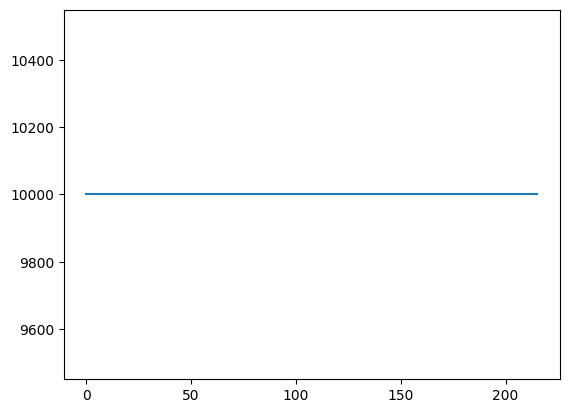

In [62]:
eval_index = 1
eval_env = DummyVecEnv([lambda: LStockDailyEnv(df_evals[eval_index])])
obs = eval_env.reset()

net_worths = []
actions = [Actions.Hold.value] * NEXT_OBSERVATION_SIZE
done, state = False, None
# while not done:

df_evals[eval_index].shape[0]
for _ in range(NEXT_OBSERVATION_SIZE, df_evals[eval_index].shape[0]):
#     print(obs)
    action, state = model.predict(obs, state=state, deterministic=True)
#     print(action)
    obs, reward, done, _info = eval_env.step(action)
    net_worths.append(_info[0]['net_worth'])
    
    actions.append(action[0])
#     eval_env.render()
    
dff = df_evals[eval_index].assign(action=actions)

dff = dff.drop(['open_normal', 'close_normal', 'high_normal', 'low_normal', 'volume_normal', 'amount_normal'], axis=1)

plt.plot(net_worths)
plt.show()

In [57]:
dddf = np.array(ddd)
dddf.shape

(200152, 4)

In [58]:
dddf[:,2][-100:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

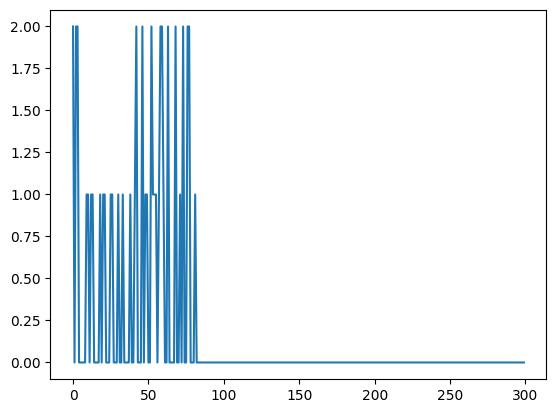

In [61]:
plt.plot(dddf[:,2][-300:]) #, '.')
plt.show()

In [149]:
actions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2]

In [150]:
dff

,open,close,high,low,volume,amount,action
date,,,,,,,
2021-01-04,4.42,4.49,4.52,4.35,29647760.0,133338600.0,0
2021-01-05,4.43,4.40,4.45,4.36,21109944.0,94177440.0,0
2021-01-06,4.46,4.45,4.55,4.41,31247276.0,141759216.0,0
2021-01-07,4.46,4.44,4.52,4.38,27802500.0,125609080.0,0
2021-01-08,4.42,4.42,4.47,4.38,19256404.0,86480144.0,0
...,...,...,...,...,...,...,...
2021-12-01,4.30,4.36,4.37,4.28,14203686.0,61504616.0,2
2021-12-02,4.36,4.34,4.40,4.34,17885142.0,78000832.0,1
2021-12-03,4.34,4.38,4.39,4.32,15323222.0,66733476.0,2


In [151]:
class PandasDataDd(PandasData):
    # Add a 'action' line to the inherited ones from the base class
    lines = ('action',)
    
    # add the parameter to the parameters inherited from the base class
    params = (('action', 7),)

In [152]:
class RLCross(bt.Strategy):
    def __init__(self):
#         self.sma1 = bt.indicators.SMA(self.dnames.d.dd, period=10, plot=False)
#         self.sma2 = bt.indicators.SMA(self.dnames.d.dd, period=20, plot=False)
        
#         self.crossover = bt.indicators.CrossOver(self.sma1, self.sma2)
        pass

    def next(self):
        
        if not self.position:  # not in the market
            if self.data0.action < 1: # if fast crosses slow to the upside
                price = self.data0.close[0]
                cash = self.broker.get_cash()
                share = int(math.floor((cash)/price))
                self.buy()  # enter long
        elif self.data0.action < 2 :  # in the market & cross to the downside
            self.close()


In [153]:
cerebro = bt.Cerebro(oldtrades=True)

feed = PandasDataDd(dataname=dff, action=6)

cerebro.adddata(feed, name='d')
cerebro.addstrategy(RLCross)

cerebro.broker.setcash(10000.0)

cerebro.broker.setcommission(0.0005)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 9999.04


In [154]:
cerebro.plot(
    iplot=False,
#     start=datetime.date(2021, 1, 1),
#     end=datetime.date(2021, 11, 24),
    style='candlestick',
    barup='green',
    bardown='red',
    barupfill=True, 
    bardownfill=False,
)

[[<Figure size 640x480 with 4 Axes>]]